In [1]:
import numpy as np
#import numpy.ma as ma
from uncertainties import ufloat, unumpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Issues with getting \micro to work
# See: https://stackoverflow.com/questions/22348756/upright-mu-in-plot-label-retaining-original-tick-fonts
# See: https://tex.stackexchange.com/questions/358064/upright-and-sans-serif-%C2%B5

In [3]:
# Maybe try using pgf? 
# See: http://notmatthancock.github.io/2018/02/27/matplotlib-latex-reference.html

In [4]:
# https://stackoverflow.com/questions/22348756/upright-mu-in-plot-label-retaining-original-tick-fonts

import matplotlib
from matplotlib import rc

matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':'sans-serif'})

## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})

params = {'text.latex.preamble':[r'\usepackage{amsmath}',
                                 r'\usepackage{physics}',
                                 r'\usepackage{sfmath}',
                                 r'\usepackage[]{siunitx}',
                                 r'\sisetup{detect-all=true}']}
plt.rcParams.update(params)

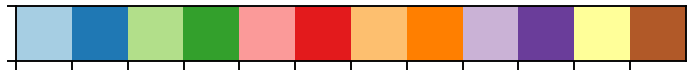

In [5]:
sns.set_context('talk')
sns.palplot(sns.color_palette("Paired"))

# Constants

In [6]:
C = 299792458 # Speed of light in [m/s]

In [7]:
wavelength = 1064E-9 # [m] (approximate) wavelength of dimple light

# Functions

In [8]:
def waist_z(z, z0, w0):
    zR = np.pi*(w0**2)/wavelength
    w_squared = (w0**2)*(1+((z-z0)**2)/(zR**2))
    return unumpy.sqrt(w_squared)

def waist_z_with_M2(z, z0, w0, M2):
    zR = np.pi*(w0**2)/wavelength/M2
    w_squared = (w0**2)*(1+((z-z0)**2)/(zR**2))
    return unumpy.sqrt(w_squared)

# Read in data

In [9]:
data = pd.read_excel('VerdiIR-20150826-Sheet_Trap.xlsx', sheet_name='Sheet1')

# Plotting

In [10]:
# Fitted beam parameters

# Horizontal waist
z0x = ufloat(32.2591, 0.369045)/100 # Horizontal waist location in [m]
w0x = ufloat(263.473, 0.895184)/1E6 # Horizontal waist location in [m]
M2x = ufloat(1, 0)

# Vertical waist
z0y = ufloat(35.795, 0.00909789)/100 # Vertical waist location in [m]
w0y = ufloat(28.0152, 0.994542)/1E6 # Horizontal waist location in [m]
M2y = ufloat(1.18296, 0.0388675)

z_fit = np.linspace(-10E-2, 60E-2, 1000)
wx_fit = waist_z_with_M2(z_fit, z0x, w0x, M2x)
wy_fit = waist_z_with_M2(z_fit, z0y, w0y, M2y)

# Scaling for plotting
z_fit = z_fit*100 # [cm]
wx_fit = wx_fit*1E6 # [um]
wy_fit = wy_fit*1E6 # [um]

print(w0x*1E6)
print(z0x*100)

print(w0y*1E6)
print(z0y*100)

263.5+/-0.9
32.3+/-0.4
28.0+/-1.0
35.795+/-0.009


In [14]:
# Data plot options
data_kwargs = {'fmt':'.'}

# Data from excel file
z = data['Calculated dist [cm]'] # Distances from reference point in [m]
wx = unumpy.uarray(data['W width e^-2 [um]'], data['W std. dev. [um]'])/2 # Radius from width in [um]
wy = unumpy.uarray(data['V width e^-2 [um]'], data['V std. dev. [um]'])/2 # Radius from width in [um]

# Plotting
plt.figure(figsize=(8,6))

# Assuming 1 mm measurement error
plt.errorbar(z, unumpy.nominal_values(wx), xerr=1/10, yerr=unumpy.std_devs(wx), **data_kwargs, 
             color=sns.color_palette("Paired")[1], capsize=3, 
             label=r'Horizontal axis', zorder=2)
# Assuming 1 mm measurement error
plt.errorbar(z, unumpy.nominal_values(wy), xerr=1/10, yerr=unumpy.std_devs(wy), **data_kwargs,
             color=sns.color_palette("Paired")[5], capsize=3, 
             label=r'Vertical axis', zorder=2)


plt.plot(z_fit, unumpy.nominal_values(wx_fit), color=sns.color_palette("Paired")[0], label=r'', zorder=1)
plt.fill_between(z_fit,
                 unumpy.nominal_values(wx_fit) + unumpy.std_devs(wx_fit),
                 unumpy.nominal_values(wx_fit) - unumpy.std_devs(wx_fit),
                 alpha=0.2,
                 color=sns.color_palette("Paired")[0], label=r'', zorder=0)

plt.plot(z_fit, unumpy.nominal_values(wy_fit), color=sns.color_palette("Paired")[2], label=r'', zorder=1)
plt.fill_between(z_fit,
                 unumpy.nominal_values(wy_fit) + unumpy.std_devs(wy_fit),
                 unumpy.nominal_values(wy_fit) - unumpy.std_devs(wy_fit),
                 alpha=0.2,
                 color=sns.color_palette("Paired")[2], label=r'', zorder=0)

# Tick settings
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.gca().tick_params(axis='both',direction='in')

# Axis limits
plt.xlim(min(z)-0.6, max(z)+0.6)
plt.ylim(0, 400)

# Axes labels
#plt.xlabel(r'Distance from end of cage system [cm]')
plt.xlabel(r'Distance [$\si{cm}$]')
#plt.ylabel(r'$\flatfrac{1}{\rm{e}^2}$ beam radius [\si{\um}]')
plt.ylabel(r'$\flatfrac{1}{\rm{e}^2}$ beam radius [\si{\mm}]')

plt.legend(loc='lower right', frameon=False)

plt.tight_layout()
#plt.savefig('sheet_profile.svg', bbox_inches='tight')
plt.show()

OSError: [Errno 22] Invalid argument: 'kpsewhich: warning: running with administrator privileges\r\nC:/Program Files/MiKTeX 2.9/fonts/tfm/public/cm/cmss12.tfm'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000020C78B1CC80> (for post_execute):


OSError: [Errno 22] Invalid argument: 'kpsewhich: warning: running with administrator privileges\r\nC:/Program Files/MiKTeX 2.9/fonts/tfm/public/cm/cmss12.tfm'

OSError: [Errno 22] Invalid argument: 'kpsewhich: warning: running with administrator privileges\r\nC:/Program Files/MiKTeX 2.9/fonts/tfm/public/cm/cmss12.tfm'

<Figure size 576x432 with 1 Axes>